# GSM interface model with scalars and vector variables

Based on the notebook 01 here we are separating the general part of the
derivation valid for any kind of generalized standard model and the particular
formulation of the external and internal state representation and the free energy and dissipation potentials

In [ ]:
%matplotlib widget
from gsm import GSM
import matplotlib.pylab as plt 
import sympy as sp
from bmcs_utils.api import Cymbol
import numpy as np
import copy
sp.init_printing()

In [ ]:
H = sp.Heaviside


def get_dirac_delta(x):
    return 0
numpy_dirac =[{'DiracDelta': get_dirac_delta }, 'numpy']

In [ ]:
x = sp.Symbol(r'x')
H_expr = H(x)
dH_expr = H_expr.diff(x)
dH_expr

## Material parameters

In [ ]:
E_T = Cymbol(r'E_{\mathrm{T}}', codename='E_T_', real=True, nonnegative=True)
gamma_T = Cymbol(r'\gamma_{\mathrm{T}}', codename='gamma_T_', real=True)
K_T = Cymbol(r'K_{\mathrm{T}}', codename='K_T_', real=True)
S_T = Cymbol(r'S_{\mathrm{T}}', codename='S_T_', real=True, nonnegative=True)
r_T = Cymbol(r'r_{\mathrm{T}}', codename='r_T_', real=True, nonnegative=True)
c_T = Cymbol(r'c_{\mathrm{T}}', codename='c_T_', real=True, nonnegative=True)
eta_T = Cymbol(r'\eta_{\mathrm{T}}', codename='eta_T_', real=True, nonnegative=True)

E_N = Cymbol(r'E_{\mathrm{N}}', codename='E_N_', real=True, nonnegative=True)
gamma_N = Cymbol(r'\gamma_{\mathrm{N}}', codename='gamma_N_', real=True)
K_N = Cymbol(r'K_{\mathrm{N}}', codename='K_N_', real=True)
S_N = Cymbol(r'S_{\mathrm{N}}', codename='S_N_', real=True, nonnegative=True)
r_N = Cymbol(r'r_{\mathrm{N}}', codename='r_N_', real=True, nonnegative=True)
c_N = Cymbol(r'c_{\mathrm{N}}', codename='c_N_', real=True, nonnegative=True)

eta_N = Cymbol(r'\eta_{\mathrm{N}}', codename='eta_N_', real=True, nonnegative=True)
zeta = Cymbol('zeta', codename='zeta_', real=True, nonnegative=True)

d_N = Cymbol(r'd_{\mathrm{N}}', codename='d_N_', real=True, nonnegative=True)
alpha_therm = Cymbol(r'\alpha_{\vartheta}', codename='alpha_therm_', real=True, nonnegative=True)
# temperature 
C_v = Cymbol(r'C_{\mathrm{v}}', codename='C_v_', real=True, nonnegative=True)
T_0 = Cymbol(r'\vartheta_0', codename='T_0_', real=True, nonnegative=True)
beta = Cymbol(r'\beta', codename='beta_', real=True, nonnegative=True)

In [ ]:
f_t = Cymbol(r'f_\mathrm{Nt}', codename='f_t_')
f_c = Cymbol(r'f_\mathrm{Nc}', codename='f_c_')
f_c0 = Cymbol(r'f_\mathrm{Nc0}', codename='f_c0_')
f_s = Cymbol(r'f_\mathrm{T}', codename='f_s_')
m = Cymbol(r'm', codename='m_', real=True, nonnegative=True)

In [ ]:
mparams = (E_T, gamma_T, K_T, S_T, c_T, f_s, E_N, S_N, c_N, m, f_t, f_c, f_c0, 
           r_N, r_T, eta_N, eta_T, zeta, C_v, T_0, d_N, alpha_therm, beta)
mparams

## External state variables

In [ ]:
u_N = Cymbol(r'u_\mathrm{N}', codename='u_N_', real=True)
u_Tx = Cymbol(r'u_\mathrm{Tx}', codename='u_Tx_', real=True)
u_Ty = Cymbol(r'u_\mathrm{Ty}', codename='u_Ty_', real=True)
u_Ta = sp.Matrix([u_Tx, u_Ty])
u_a = sp.Matrix([u_N, u_Tx, u_Ty])
sig_N = Cymbol(r'\sigma_\mathrm{N}', codename='sig_N_', real=True)
sig_Tx = Cymbol(r'\sigma_\mathrm{Tx}', codename='sig_Tx_', real=True)
sig_Ty = Cymbol(r'\sigma_\mathrm{Ty}', codename='sig_Ty_', real=True)
sig_Ta = sp.Matrix([sig_Tx, sig_Ty])
sig_a = sp.Matrix([sig_N, sig_Tx, sig_Ty])

In [ ]:
T = Cymbol(r'\vartheta', codename='T_', real=True)
Gamma = sp.exp(-beta * (T - T_0))
Gamma

## Internal state variables

In [ ]:
u_p_N = Cymbol(r'u_\mathrm{N}^\mathrm{p}', codename='u_p_N_', real=True)
u_p_Tx = Cymbol(r'u_\mathrm{Tx}^\mathrm{p}', codename='u_p_Tx_', real=True)
u_p_Ty = Cymbol(r'u_\mathrm{Ty}^\mathrm{p}', codename='u_p_Ty_', real=True)
u_p_Ta = sp.Matrix([u_p_Tx, u_p_Ty])
u_p_a = sp.Matrix([u_p_N, u_p_Tx, u_p_Ty])
sig_p_N = Cymbol(r'\sigma^\mathrm{p}_\mathrm{N}', codename='sig_p_N_', real=True)
sig_p_Tx = Cymbol(r'\sigma^\mathrm{p}_\mathrm{Tx}', codename='sig_p_Tx_', real=True)
sig_p_Ty = Cymbol(r'\sigma^\mathrm{p}_\mathrm{Ty}', codename='sig_p_Ty_', real=True)
sig_p_Ta = sp.Matrix([sig_p_Tx, sig_p_Ty])
sig_p_a = sp.Matrix([sig_p_N, sig_p_Tx, sig_p_Ty])

In [ ]:
omega_N = Cymbol(r'\omega_\mathrm{N}', codename='omega_N_', real=True)
omega_T = Cymbol(r'\omega_\mathrm{T}', codename='omega_T_', real=True)
omega_ab = sp.Matrix([[H(sig_p_N) * omega_N, 0, 0],
                      [0, omega_T, 0],
                      [0, 0, omega_T]])
# omega_ab = sp.Matrix([[omega_N, 0, 0],
#                       [0, omega_T, 0],
#                       [0, 0, omega_T]])
omega_a = sp.Matrix([omega_N, omega_T])
Y_N = Cymbol(r'Y_\mathrm{N}', codename='Y_N_', real=True)
Y_T = Cymbol(r'Y_\mathrm{T}', codename='Y_T_', real=True)
Y_a = sp.Matrix([Y_N, Y_T])

In [ ]:
z_N = Cymbol(r'z_\mathrm{N}', codename='z_N_', real=True)
z_T = Cymbol(r'z_\mathrm{T}', codename='z_T_', real=True)
K_ab = sp.Matrix([[K_T]])
z_a = sp.Matrix([z_T])
Z_N = Cymbol(r'Z_\mathrm{N}', codename='Z_N_', real=True)
Z_T = Cymbol(r'Z_\mathrm{T}', codename='Z_T_', real=True)
Z_a = sp.Matrix([Z_T])

In [ ]:
alpha_N = Cymbol(r'\alpha_\mathrm{N}', codename='alpha_N_', real=True, nonnegative=True)
alpha_Tx = Cymbol(r'\alpha_\mathrm{Tx}', codename='alpha_Tx_', real=True, nonnegative=True)
alpha_Ty = Cymbol(r'\alpha_\mathrm{Ty}', codename='alpha_Ty_', real=True, nonnegative=True)
gamma_ab = sp.Matrix([[0, 0, 0],
                      [0, gamma_T, 0],
                      [0, 0, gamma_T]])
alpha_Ta = sp.Matrix([alpha_Tx, alpha_Ty])
alpha_a = sp.Matrix([alpha_N, alpha_Tx, alpha_Ty])
X_N = Cymbol(r'X_\mathrm{N}', codename='X_N_', real=True, nonnegative=True)
X_Tx = Cymbol(r'X_\mathrm{Tx}', codename='X_Ty_', real=True, nonnegative=True)
X_Ty = Cymbol(r'X_\mathrm{Ty}', codename='X_Tx_', real=True, nonnegative=True)
X_Ta = sp.Matrix([X_Tx, X_Ty])
X_a = sp.Matrix([X_N, X_Tx, X_Ty])

## Free energy potential

In [ ]:
E_ab = sp.Matrix([[E_N, 0, 0],
                  [0, E_T, 0],
                  [0, 0, E_T]])
u_el_a = u_a - u_p_a
E_eff_ab = (sp.eye(3) - omega_ab) * E_ab
E_eff_ab

In [ ]:
U_T_ = ( (1 - H(sig_p_N) * omega_N) * E_N * alpha_therm * (T - T_0) * (u_N - u_p_N) * d_N )
U_e_ = sp.Rational(1,2) * (u_el_a.T * E_eff_ab * u_el_a)[0]
U_p_ = sp.Rational(1,2) * (z_a.T * K_ab * z_a + alpha_a.T * gamma_ab * alpha_a)[0]
TS_ = C_v * (T - T_0) **2 / (2 * T_0)
F_ = U_e_ + U_p_ + U_T_ - TS_
F_

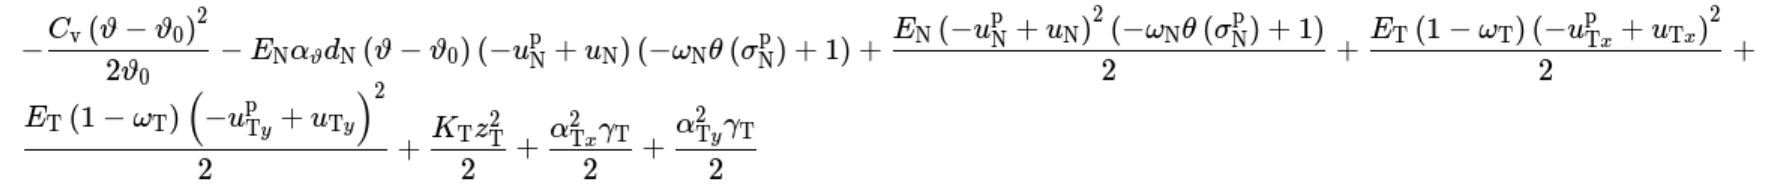

## Dissipation potential

In [ ]:
%%capture
%run threshold_function_f_df.ipynb

In [ ]:
sig_eff_Tx = sp.Function(r'\sigma^{\mathrm{eff}}_{\mathrm{T}x}')(sig_p_Tx, omega_T)
sig_eff_Ty = sp.Function(r'\sigma^{\mathrm{eff}}_{\mathrm{T}y}')(sig_p_Ty, omega_T)
sig_eff_N = sp.Function(r'\sigma^{\mathrm{eff}}_{\mathrm{N}}')(sig_p_N, omega_N)
q_Tx = sp.Function(r'q_Tx')(sig_eff_Tx,X_Tx)
q_Ty = sp.Function(r'q_Ty')(sig_eff_Ty,X_Ty)
q_N = sp.Function(r'q_N')(sig_eff_N)
norm_q_T = sp.sqrt(q_Tx*q_Tx + q_Ty*q_Ty)
subs_q_T = {q_Tx: (sig_eff_Tx - X_Tx), q_Ty: (sig_eff_Ty - X_Ty)}
subs_q_N = {q_N: sig_eff_N - X_N}
subs_sig_eff = {sig_eff_Tx: sig_p_Tx / (1-omega_T),
                  sig_eff_Ty: sig_p_Ty / (1-omega_T),
                  sig_eff_N: sig_p_N / (1-omega_N)
                 }

In [ ]:
f_ = (f_solved_
      .subs({x: q_N, y: norm_q_T})
      .subs(subs_q_T)
      .subs(subs_q_N)
      .subs(subs_sig_eff)
      .subs(f_s, ((f_s+Z_T) * Gamma))
     )
f_

In [ ]:
S_NT = sp.sqrt(S_N*S_T)
c_NT = sp.sqrt(c_N*c_T)
r_NT = sp.sqrt(r_N*r_T)
omega_NT = 1 - sp.sqrt((1-omega_N)*(1-omega_T))
phi_N = (1 - omega_N)**c_N * S_N / (r_N+1) * (Y_N / S_N)**(r_N+1)
phi_T = (1 - omega_T)**c_T * S_T / (r_T+1) * (Y_T / S_T)**(r_T+1)
phi_NT = (1 - omega_NT)**c_NT * S_NT / (r_NT+1) * ((Y_N + Y_T)/(S_NT))**(r_NT+1)
phi_ext_ = ((1 - zeta)*(phi_N + phi_T) + zeta*phi_NT)

In [ ]:
t_relax_N_ = eta_N / (E_N)
t_relax_T_ = eta_T / (E_T + K_T + gamma_T)
t_relax_ = sp.Matrix([
                    t_relax_N_,
                    t_relax_T_,
                    t_relax_T_,
                    t_relax_T_,
                    t_relax_T_,
                    t_relax_T_,
                    ] 
               )

In [ ]:
gsm = GSM(
    u_vars = u_a,
    T_var = T,
    m_params = mparams,
    Eps_vars = (u_p_a, z_a, alpha_a, omega_a),
    Sig_vars = (sig_p_a, Z_a, X_a, Y_a),
    Sig_signs = (-1, 1, 1, -1),
    F_expr = F_,
    f_expr = f_,
    phi_ext_expr = phi_ext_,
    t_relax = t_relax_
)

In [ ]:
_u_a = np.array([-20, 3, 0])
_T = np.array([20])
material_params = dict(
    E_T_=1, gamma_T_=1, K_T_=1, S_T_=1000, c_T_=1, f_s_=1, 
    E_N_=1, S_N_=1000, c_N_=1, m_=0.1, f_t_=1, f_c_=20, f_c0_=10, 
    r_N_=2, r_T_=2, zeta_=0.0001, eta_N_=1, eta_T_=1, d_N_=0, alpha_therm_=1e-5, 
    T_0_=20, C_v_=1, beta_=1
)
_Eps_B00 = np.zeros((gsm.n_Eps_explicit,), np.float_ )
_f = gsm.get_f(_u_a, 20, _Eps_B00, _Eps_B00, **material_params)
_df_dlambda = gsm.get_df_dlambda(_u_a, 20, _Eps_B00, _Eps_B00, **material_params)
_f2, _df_dlambda2, _Sig_B00 = gsm.get_f_df_Sig(_u_a, _T, _Eps_B00, _Eps_B00, **material_params)
_Phi = gsm.get_Phi(_u_a, 20, _Eps_B00, _Sig_B00, **material_params)
_f2, _df_dlambda2, _Sig_B00, _Phi

## Quantitative verification for a single time step, single point

In [ ]:
_u_Ia = np.zeros((1, 3), np.float_)
n_I = len(_u_Ia)
_du_Ia = np.zeros_like(_u_Ia)
# _du_I[:, 0] = [0.0001, 0.0001, 0.0001, -20]
# _du_I[:, 1] = [0.0001, 0.1, 0.12, 1.2]
_du_Ia[:, 0] = [-20]
_du_Ia[:, 1] = [1.2]
_T_I = np.ones((n_I,)) * 20
_Eps_IB = np.zeros((n_I,) + (gsm.n_Eps_explicit,), np.float_)
material_params = dict(
    E_T_=1, gamma_T_=0, K_T_=0, S_T_=1, c_T_=1, f_s_=1, 
    E_N_=1, S_N_=1, c_N_=1, m_=0.0000005, f_t_=1, f_c_=20, f_c0_=10, 
    r_N_=2, r_T_=2, zeta_=0.0001, eta_N_=1, eta_T_=1, d_N_=0, alpha_therm_=1e-5, 
    T_0_=20, C_v_=1, beta_=1
)
Eps_1, Sig_1,  T_1, k, dDiss_dEps_1 = gsm.get_state_n1(_u_Ia, _du_Ia, _T_I, 
                               0.02, _Eps_IB, _Eps_IB, 50, **material_params)
Eps_1, Sig_1, T_1, k, dDiss_dEps_1

## Vectorized evaluation of a single step on a domain

In [ ]:
material_params = dict(
    E_T_=1, gamma_T_=0, K_T_=0, S_T_=1, c_T_=1, f_s_=1, 
    E_N_=1, gamma_N_=0, K_N_=0, S_N_=1, c_N_=1, m_=0.0000005, f_t_=1, f_c_=20, f_c0_=10, 
    r_N_=2, r_T_=2, zeta_=1, eta_N_=1, eta_T_=1, d_N_=0, alpha_therm_=1e-5, 
    T_0_=20, C_v_=1, beta_=1
)

In [ ]:
n_t = 50
n_I = 1
u_N_max = 3.3
u_T_max = 1e-5 
_t_t = np.linspace(0, 1, n_t)
_u_tIa = np.zeros((n_t, n_I, 3), np.float_)
_u_tIa[:, 0, 0] = np.linspace(0, u_N_max, n_t)
_u_tIa[:, 0, 1] = np.linspace(0, u_T_max, n_t)
_T0_I = np.ones((n_I,)) * 20
mp = copy.deepcopy(material_params)
mp['eta_T_'] = 100
response = gsm.get_response(_u_tIa, _t_t, _T0_I, k_max=50, **mp)

In [ ]:
_Eps_vals = response[3]
_Eps_vals[:,0,:].shape

In [ ]:
from gsm_plot import GSMPlot
gsm_plot = GSMPlot(gsm=gsm)
gsm_plot.param_study_plot('testing', {'run' : response}, a_idx=0, **mp)

In [ ]:
get_Phi_8 = sp.lambdify((gsm.Eps.as_explicit(), gsm.Sig.as_explicit(), *gsm.m_params), gsm.Phi_[9,0])

In [ ]:
_Eps_0 = np.zeros((gsm.n_Eps_explicit,), dtype=np.float_)
_Sig_0 = np.zeros((gsm.n_Eps_explicit,), dtype=np.float_)
material_params = dict(
    E_T_=1, gamma_T_=0, K_T_=0, S_T_=10000, c_T_=1, f_s_=1, 
    E_N_=1, gamma_N_=0, K_N_=0, S_N_=10000, c_N_=1, m_=0.1, f_t_=1, f_c_=20, f_c0_=10, 
    r_N_=2, r_T_=2, zeta_=1, eta_N_=1, eta_T_=1, d_N_=0, alpha_therm_=1e-5, 
    T_0_=20, C_v_=1, beta_=1
)
u_n1 = np.array([-1, 1.2, 0])
_f_k, _df_k, _Sig_k = gsm.get_f_df_Sig(u_n1, 20, _Eps_0, _Sig_0, **material_params)
_lam_k = _df_k / _f_k

_Phi_k_8 = get_Phi_8(_Eps_0, _Sig_k, **material_params)
_Phi_k = gsm.get_Phi(u_n1, 20, _Eps_0, _Sig_k, **material_params)
_Phi_k_8, _Phi_k


In [ ]:


_Eps_k = _Eps_0 + _lam_k * _Phi_k

# _Eps_k = gsm.get_Eps_k1(u_n1, 20, _Eps_0, _lam_k, _Eps_0, _Sig_k, **material_params)
_Sig_k, _Phi_k


In [ ]:

# Eps_1, Sig_1, T_1, k, dDiss_dEps_1 = gsm.get_state_n1(np.array([0, 0, 0]), 
#                                np.array([-1, 1.2, 0]), 20, 
#                                0.02, _Eps_0, _Sig_0, 2, **material_params)
# Eps_1, Sig_1, T_1, k, dDiss_dEps_1

Eps_1, Sig_1, k = gsm.get_state_n1(np.array([0, 0, 0]), 
                               np.array([-1, 1.2, 0]), 20, 
                               0.02, _Eps_0, _Sig_0, 2, **material_params)
Eps_1, Sig_1, k